# Load libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#  Read and explore the given dataset

In [2]:
df = pd.read_csv('ratings_Electronics (1).csv', names=['userId', 'productId','rating','timestamp'])
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [4]:
df.shape

(7824482, 4)

In [5]:
df.memory_usage()

Index             128
userId       62595856
productId    62595856
rating       62595856
timestamp    62595856
dtype: int64

In [6]:
df.memory_usage().sum()

250383552

In [7]:
df.describe()

,rating,timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [8]:
df.skew()

rating      -1.205397
timestamp   -1.921830
dtype: float64

In [9]:
df.kurtosis()

rating       0.041471
timestamp    4.414939
dtype: float64

In [10]:
df.corr()

,rating,timestamp
rating,1.000000,0.041648
timestamp,0.041648,1.000000


<AxesSubplot:>

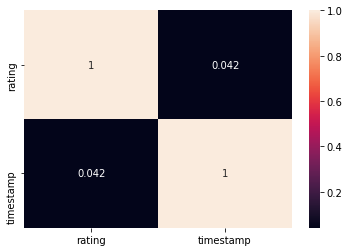

In [11]:
sns.heatmap(df.corr(), annot=True)

# Data Cleansing

### Removing duplicates and take a subset of the dataset to make it less sparse/ denser

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df = df[:int(len(df) * .1)]
df.shape

(782448, 4)

### Find minimum and maximum ratings.

In [14]:
print('The minimum rating is: %d' %(df['rating'].min()))
print('The maximum rating is: %d' %(df['rating'].max()))

The minimum rating is: 1
The maximum rating is: 5


### Check the Rating distribution in the range 1-5 

C:\Users\Kalki J\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


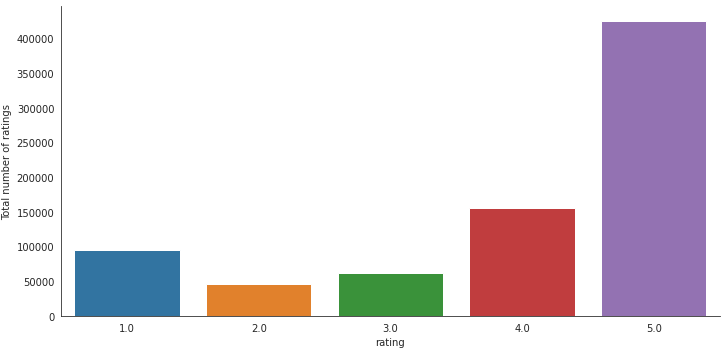

In [15]:
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

### Information from the data.

In [16]:
print("Total data ")
print("*"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.userId)))
print("Total No of products  :", len(np.unique(df.productId)))

Total data 
**************************************************

Total no of ratings : 782448
Total No of Users   : 606149
Total No of products  : 47105


### Highest rated products from the selected records. 

In [17]:
counts1 = df['userId'].value_counts()
Data_new = df[df['userId'].isin(counts1[counts1 >= 50].index)]
Data_new.groupby('productId')['rating'].mean().sort_values(ascending=False) 

productId
B000068IGI    5.0
B00006IJO4    5.0
B00006JI6T    5.0
B0001CNKCM    5.0
B000816XI4    5.0
             ... 
B00005QWZ7    1.0
B00009W5QR    1.0
B00005RKO5    1.0
B00005UV2R    1.0
1400532655    1.0
Name: rating, Length: 2207, dtype: float64

# Plotting

### Scatterplot

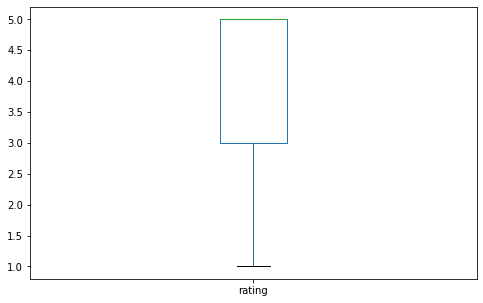

In [33]:
df['rating'].plot.box(figsize=(8, 5));

### Histogram

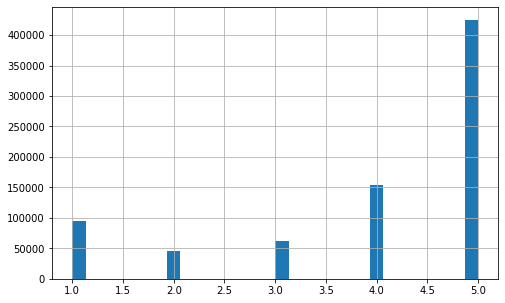

In [24]:
df['rating'].hist(bins=30, figsize=(8, 5));

### Barplot

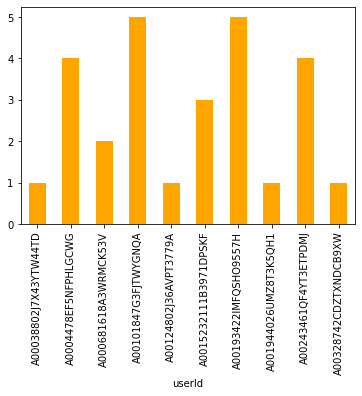

In [34]:
df_avg_rate = df.groupby('userId')['rating'].mean()
df_avg_rate[:10].plot.bar(color='orange');